In [2]:
#모델 평가
#훈련 세트 크기에 따른 영향 시각화

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits() # 데이터 로드
features, target = digits.data, digits.target # 특성 행렬과 타깃 벡터 분리

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수를 계산합니다.
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), # 분류기
                                                        features, # 특성 행렬
                                                        target, # 타깃 벡터
                                                        cv=10, # 폴드 수
                                                        scoring='accuracy', # 성능 지표
                                                        n_jobs=-1, # 모든 코어 사용
                                                        train_sizes=np.linspace( 0.01, 1.0, 50)) # 50개의 훈련 세트 크기

In [ ]:
# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프를 그립니다.
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# 표준 편차 영역을 그립니다.
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# 그래프를 출력합니다.
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#훈련 세트 샘플의 1%에서 100%까지 50개 크기에서 랜덤 포레스트 분류기의 정확도를 그래프로 출력합니다.
#모델의 교차검증 정확도가 증가하면 추가적인 샘플이 도움이 된다는 것을 의미합니다.

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris() # 데이터 로드
features = iris.data, target = iris.target
class_names = iris.target_names # 타깃 클래스 이름의 리스트

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split( features, target, random_state=1)
classifier = LogisticRegression() # 로지스틱 회귀 모델 객체 생성
model = classifier.fit(features_train, target_train) # 모델 훈련
target_predicted = model.predict(features_test) # 예측

print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names)) # 분류 리포트 새성

In [ ]:
# 분류 리포트를 만듭니다.
print(classification_report(target_test, target_predicted, labels=[0,1,2,3])) 

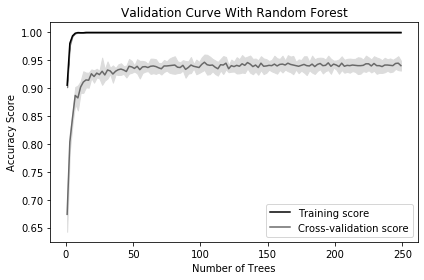

In [1]:
#하이퍼파라미터 값의 영향 시각화
#실습: 트리 개수가 증가할 때 랜덤 포레스트 분류기의 훈련 세트 정확도와 교차검증 정확도의 변화를 시각화
#검증 곡선을 그려 모델의 하이퍼파라미터 값 변화에 따른 성능 변화 확인
#랜덤 포레스트 분류기의 하이퍼파라미터는 앙상블을 할 트리의 개수
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits()
features, target = digits.data, digits.target
param_range = np.arange(1, 250, 2) #파라미터 값의 범위

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                            features,
                                            target,
                                            param_name='n_estimators', #조사할 하이퍼파라미터
                                            param_range=param_range, #하이퍼파라미터 값의 범위
                                            cv=3, #폴드 수
                                            scoring='accuracy', #성능 지표
                                            n_jobs=-1) #모든 코어 사용
#훈련과 테스트 세트 점수의 평균과 표준 편차 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로
plt.plot(param_range, train_mean, label='Training score', color='black')
plt.plot(param_range, test_mean, label='Cross-validation score', color='dimgrey')

#훈련 세트와 테스트 세트의 정확도에 대한 표준 편차를 그래프로
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='gainsboro')
#mean위아래로 std만큼 벌어진 선을 색을 채워 그려넣는 코드

plt.title('Validation Curve With Random Forest')
plt.xlabel('Number of Trees'), plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc='best')
plt.show()